# Load libraries


In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
# Set the root directory to be able to access other folders in the project

CURR_DIR = os.getcwd()  # current working directory
BASE_DIR = Path(CURR_DIR).parent  # parent directory
print(BASE_DIR)

/home/adrien/Documents/Github/MFA/additional_material


# Import data


The `MFA_II_tutorial_II.xlsx` contains inflow data about the funky furnitures of a mysterious hoarder.

![funky_furnitures](../img/funky_furnitures.png)


In [3]:
# Load the funky furnitures inflows and check your data
file_path = BASE_DIR / "data_input" / "MFA_II_tutorial_II.xlsx"
data = pd.read_excel(file_path, sheet_name="inflow_driven")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     61 non-null     int64  
 1   stock    0 non-null      float64
 2   inflow   61 non-null     int64  
 3   outflow  0 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 2.0 KB


In [4]:
# set the index to year
data = data.set_index(["year"])

# define useful variables
years = data.index
end_year = years[-1]

data

,stock,inflow,outflow
year,,,
1990,NaN,13,NaN
1991,NaN,14,NaN
1992,NaN,12,NaN
1993,NaN,10,NaN
1994,NaN,7,NaN
...,...,...,...
2046,NaN,66,NaN
2047,NaN,67,NaN
2048,NaN,70,NaN


In [5]:
time_max = data.shape[0]
timesteps = np.arange(0, time_max)

# Survival curve


For now, just use the code below. We will dive into survival curves later on in the `week_2_survival_curves.ipynb` notebook.


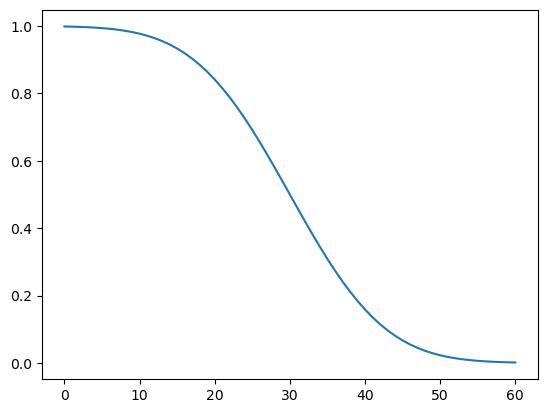

In [6]:
# Normal distribution
curve_surv = norm.sf(timesteps, loc=30, scale=10)

plt.plot(curve_surv)
plt.show()

# Survival curve matrix


![shifted_survival_curve](../img/shifted_survival_curve.png)


In [7]:
# create survival curve matrix filled with zeros
curve_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# and populate that matrix
for time in timesteps:
    # at each iteration, we shift the survival curve
    shifted_curve_surv = curve_surv[0 : time_max - time]
    # and we fill the survival curve matrix with the shifted survival curve
    curve_surv_matrix.loc[time:time_max, time] = shifted_curve_surv

curve_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,0.044565,...,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.00000
57,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,...,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.00000
58,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,...,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.00000
59,0.001866,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,...,0.986097,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.00000


# Flow driven model


![flow_driven_equations](../img/flow_driven_equations.png)


In [8]:
# This is our first model input
inflows = data["inflow"]
inflows

year
1990    13
1991    14
1992    12
1993    10
1994     7
        ..
2046    66
2047    67
2048    70
2049    77
2050    80
Name: inflow, Length: 61, dtype: int64

In [9]:
# And this is our second model input
curve_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,0.044565,...,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.000000,0.00000
57,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,0.035930,...,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.000000,0.00000
58,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,0.028717,...,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.000000,0.00000
59,0.001866,0.002555,0.003467,0.004661,0.006210,0.008198,0.010724,0.013903,0.017864,0.022750,...,0.986097,0.989276,0.991802,0.993790,0.995339,0.996533,0.997445,0.998134,0.998650,0.00000


## Cohort matrix


In [10]:
# We create the cohort_surv_matrix filled with zeros
cohort_surv_matrix = pd.DataFrame(0, index=timesteps, columns=timesteps, dtype=float)

# And we populate it
for time in timesteps:
    # we scale the shifted survival curve with the inflow of the time-th year
    cohort_surv_matrix.loc[:, time] = curve_surv_matrix.loc[:, time] * inflows.iloc[time]

cohort_surv_matrix

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,12.982451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,12.975744,13.981101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,12.966783,13.973879,11.983801,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,12.954929,13.964228,11.977610,9.986501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,12.939405,13.951462,11.969338,9.981342,6.990551,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.060595,0.086935,0.098370,0.107241,0.097324,0.357288,0.500503,0.660481,1.006049,1.336964,...,65.590162,63.701684,64.774647,69.821141,64.878722,65.910907,0.000000,0.000000,0.000000,0.000000
57,0.045071,0.065257,0.074516,0.081975,0.075069,0.278069,0.393017,0.523253,0.804064,1.077910,...,65.458963,63.602581,64.697023,69.757312,64.833917,65.876856,66.909557,0.000000,0.000000,0.000000
58,0.033217,0.048538,0.055934,0.062097,0.057383,0.214482,0.305876,0.410882,0.637004,0.861497,...,65.292209,63.475358,64.596372,69.673717,64.774647,65.831361,66.874991,69.905507,0.000000,0.000000
59,0.024256,0.035772,0.041604,0.046612,0.043468,0.163951,0.235930,0.319779,0.500204,0.682504,...,65.082372,63.313657,64.467160,69.565323,64.697023,65.771180,66.828806,69.869393,76.896058,0.000000


Preparing data using flow-driven strategy.
Creating animation using flow-driven strategy.


IntSlider(value=0, continuous_update=False, description='Time step', layout=Layout(width='85%'), max=60)

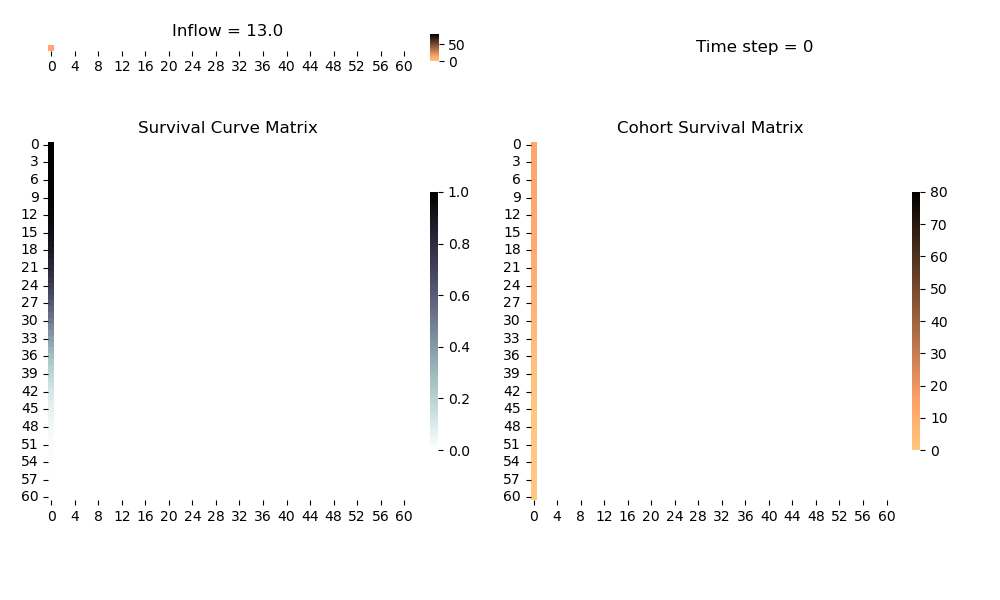

In [11]:
%matplotlib widget

# Import the animation function
from jupyter_animation import interactive_animation

interactive_animation(
    model_name="flow-driven",
    inflow=inflows.values,
    curve_surv_matrix=curve_surv_matrix.values,
    cohort_surv_matrix=cohort_surv_matrix.values,
    timesteps=timesteps,
    all_steps=False,  # If all_steps is True, show current steps + all previous steps
    # figsize=(10, 10),  # default figsize is (10, 6)
)

In [12]:
time = 2  # increase the time step to see how we populate the cohort_surv_matrix

print(f"Inflow = {inflows.iloc[time]}\n")

print("curve_surv_matrix:")
display(curve_surv_matrix.loc[:, :time].head(10))

print("cohort_surv_matrix:")
display(cohort_surv_matrix.loc[:, :time].head(10))

Inflow = 12

curve_surv_matrix:


,0,1,2
0,0.998650,0.000000,0.000000
1,0.998134,0.998650,0.000000
2,0.997445,0.998134,0.998650
3,0.996533,0.997445,0.998134
4,0.995339,0.996533,0.997445
5,0.993790,0.995339,0.996533
6,0.991802,0.993790,0.995339
7,0.989276,0.991802,0.993790
8,0.986097,0.989276,0.991802
9,0.982136,0.986097,0.989276


cohort_surv_matrix:


,0,1,2
0,12.982451,0.000000,0.000000
1,12.975744,13.981101,0.000000
2,12.966783,13.973879,11.983801
3,12.954929,13.964228,11.977610
4,12.939405,13.951462,11.969338
5,12.919274,13.934743,11.958396
6,12.893432,13.913065,11.944066
7,12.860587,13.885234,11.925484
8,12.819255,13.849862,11.901630
9,12.767763,13.805352,11.871311
